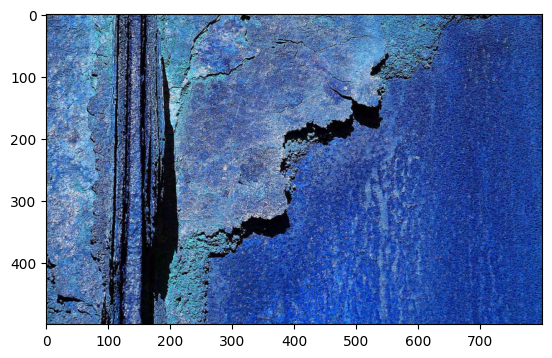

In [110]:
import cv2 as cv
import matplotlib.pyplot as plt
image=cv.imread("Corroded1.jpg")
image=cv.resize(image,(800,500))
plt.imshow(image)

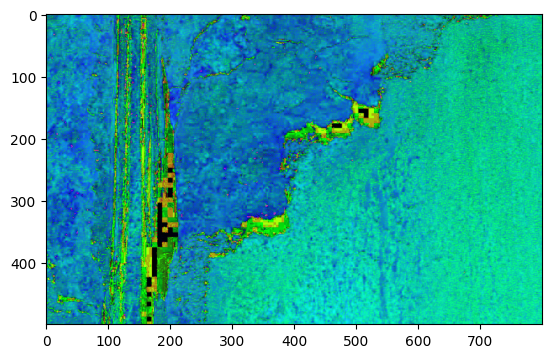

In [111]:
import numpy as np
lh = np.array([0, 70, 70], np.uint8)
uh = np.array([20, 200, 150], np.uint8)
hsvimg = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.imshow(hsvimg)

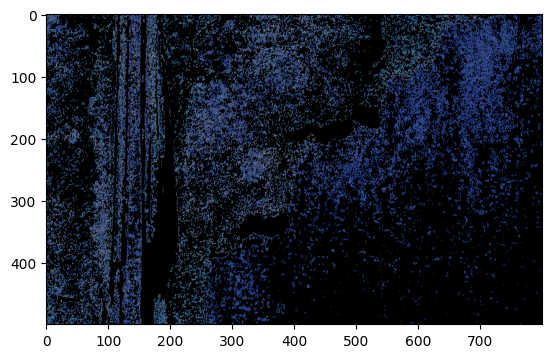

In [112]:
mask = cv.inRange(hsvimg, lh, uh)
maskimg = cv.bitwise_and(image, image, mask=mask)
masking=cv.dilate(maskimg,(3,3))
plt.imshow(masking)

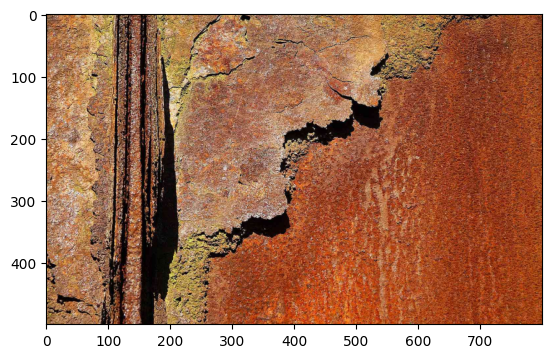

In [113]:
# Find contours in the mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv.drawContours(image, contours, 1, (0, 255, 0), 1)  # Green contours

# Display the original image with contours
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [114]:
Area=[cv.contourArea(cnt) for cnt in contours]

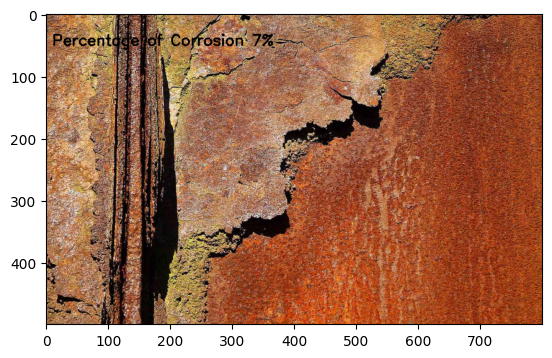

In [115]:
cv.putText(image, "Percentage of Corrosion {}%".format(round((sum(Area)/(800*500))*100),2),(10,50), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
